### Lab 03

Labs in general are for you to solve short programming challenges in class. In contrast, homework assignments will involve more challenging and lengthy problems.

Feel free to ask the TAs for help if there is anything you do not understand. The TAs will go through suggested solutions in the last 15 minutes of the lab - typically by solving them in a live demo. **Your midterm exams will be like this, so it is highly beneficial for you to attend these labs**.

The second lab is to gain basic familiarity with handling numeric and data frame data. 

- You can import any Python standard library module you need
- Do this lab without using the web to search for solutions

**1**. Basic array manipulation

- Generate a random matrix with shape (4,5) with draws from a standard normal distribution
- Find row sums
- Scale so each row has min=0 and max=1 (for a challenge, do this in one line of code)
- Find row sums when you exclude the max in each row

In [1]:
import numpy as np

In [2]:
x = np.random.normal(0, 1, (4,5))

In [3]:
x

array([[-1.28090366,  0.19687835, -1.516229  ,  1.05159129, -0.30260217],
       [-0.14188811, -1.07072245, -1.31945523, -0.4103233 ,  0.49280783],
       [ 0.49013975,  0.88209087, -0.64466478, -0.46706876, -0.49976117],
       [-0.57184203,  0.70601766,  1.45721472,  0.07583094,  1.22662406]])

In [4]:
x.sum(axis=1)

array([-1.8512652 , -2.44958126, -0.2392641 ,  2.89384535])

In [5]:
x.shape

(4, 5)

In [6]:
y = (x - x.min(axis=1)[:, None])/(x.max(axis=1)[:, None] - x.min(axis=1)[:, None])
y

array([[0.09164401, 0.66714457, 0.        , 1.        , 0.47262919],
       [0.64977714, 0.13724982, 0.        , 0.50165561, 1.        ],
       [0.74327842, 1.        , 0.        , 0.11632249, 0.0949095 ],
       [0.        , 0.62978016, 1.        , 0.31919904, 0.88635574]])

In [7]:
import numpy.ma as ma

In [8]:
ma.masked_where(y==1, x).sum(axis=1).data

array([-2.90285649, -2.9423891 , -1.12135496,  1.43663063])

**2**. Create the following array using `fromfunction`

```
array([[18, 13, 10,  9, 10, 13, 18],
       [13,  8,  5,  4,  5,  8, 13],
       [10,  5,  2,  1,  2,  5, 10],
       [ 9,  4,  1,  0,  1,  4,  9],
       [10,  5,  2,  1,  2,  5, 10],
       [13,  8,  5,  4,  5,  8, 13],
       [18, 13, 10,  9, 10, 13, 18]])
```

In [9]:
np.fromfunction(lambda i, j: (i-3)**2 + (j-3)**2, (7,7)).astype('int')

array([[18, 13, 10,  9, 10, 13, 18],
       [13,  8,  5,  4,  5,  8, 13],
       [10,  5,  2,  1,  2,  5, 10],
       [ 9,  4,  1,  0,  1,  4,  9],
       [10,  5,  2,  1,  2,  5, 10],
       [13,  8,  5,  4,  5,  8, 13],
       [18, 13, 10,  9, 10, 13, 18]])

**3**. Put a red rectangle near the nose of the raccoon.

In [10]:
from scipy import misc
f = misc.face()
f.setflags(write=1)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

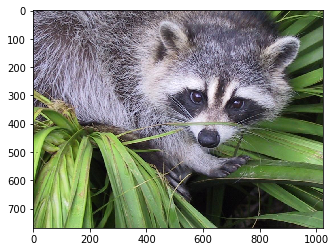

In [12]:
plt.imshow(f);

In [13]:
f.shape

(768, 1024, 3)

In [14]:
f[400:480, 600:650, :] = np.array([255,0,0])

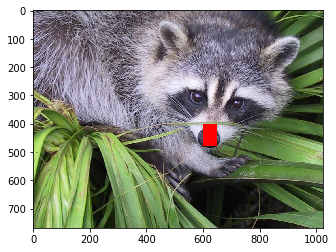

In [15]:
plt.imshow(f);

**4**. Download the iris data set from https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv as a pnadas DataFrame.

- Show the columns ending with `width`
- show the rows where the sum of petal length and petal width is greater than 8
- Sort in decreasing order of petal.width and break ties by increasing order of petal.length
- Convert all numerical columns to their log values
- Find the median value of all numeric variables for each species
- Convert to a "tall" matrix with just 3 columns `variety, measurement, value`

In all cases, only display the first 3 rows of the result

In [16]:
import pandas as pd

In [17]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [18]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [19]:
df.loc[:, df.columns.str.endswith('width')].head(3)

,sepal.width,petal.width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2


In [20]:
df[df['petal.length'] + df['petal.width'] > 8].head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
100,6.3,3.3,6.0,2.5,Virginica
105,7.6,3.0,6.6,2.1,Virginica
107,7.3,2.9,6.3,1.8,Virginica


In [21]:
df.sort_values(by=['petal.width', 'petal.length'],
               ascending=[False, True]).head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
144,6.7,3.3,5.7,2.5,Virginica
100,6.3,3.3,6.0,2.5,Virginica
109,7.2,3.6,6.1,2.5,Virginica


In [22]:
df.select_dtypes(include=np.number).apply(np.log).head(3)

,sepal.length,sepal.width,petal.length,petal.width
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438


In [23]:
df.groupby('variety').median()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.0,3.4,1.50,0.2
Versicolor,5.9,2.8,4.35,1.3
Virginica,6.5,3.0,5.55,2.0


In [24]:
pd.melt(df, id_vars='variety', var_name='measurement').head(3)

,variety,measurement,value
0,Setosa,sepal.length,5.1
1,Setosa,sepal.length,4.9
2,Setosa,sepal.length,4.7
